In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Задание 1

In [2]:
data = pd.read_csv("Table 1.csv")
data

,Высота (мм),исп. 1 (мс),исп. 2 (мс),исп. 3 (мс),исп. 4 (мс),исп. 5 (мс)
0,1200,502.60,499.01,497.66,499.63,494.30
1,1100,462.42,460.40,478.44,474.87,460.23
2,1000,560.00,456.28,495.34,461.17,494.39
3,900,429.68,452.36,346.65,450.24,432.53
4,800,389.14,414.50,404.52,416.60,395.10


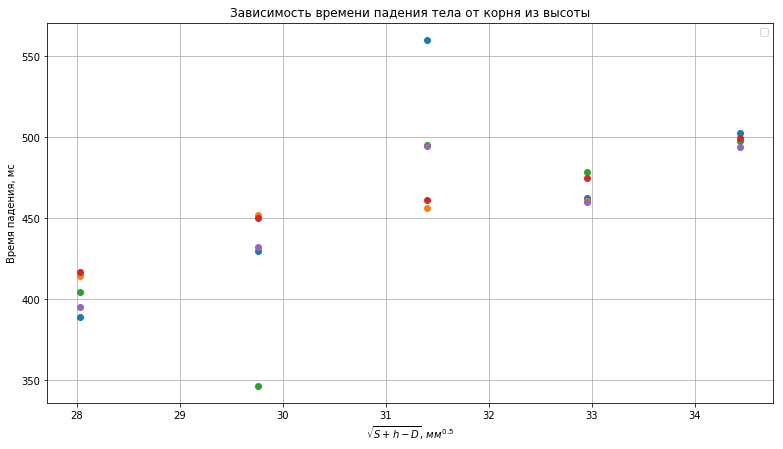

In [3]:
import math
tmp = data
tmp["Высота (мм)"] = (tmp["Высота (мм)"] - 14.3) ** 0.5
tmp.plot(x="Высота (мм)", style="o")
plt.gcf().set_size_inches(13, 7)
plt.grid(True)
plt.title("Зависимость времени падения тела от корня из высоты");
plt.xlabel("$\sqrt{S + h - D}$, $мм^{0.5}$")
plt.ylabel("Время падения, мс")
plt.legend([]);

## Задание 2

In [4]:
data = pd.read_csv("Table 2.csv")
data

,Диаметр (мм),исп. 1 (мс),исп. 2 (мс),исп. 3 (мс),исп. 4 (мс),исп. 5 (мс)
0,14.3,480.41,480.41,480.76,480.67,480.86
1,12.7,476.72,477.29,479.21,476.64,476.67
2,11.0,473.03,473.16,476.28,473.23,473.48
3,9.5,470.20,470.27,470.23,470.26,470.25


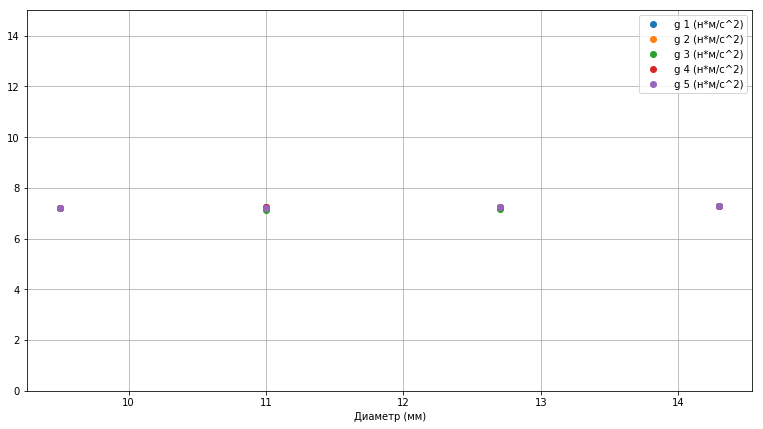

In [5]:
from math import sqrt
from copy import copy

def g(S_plus_h, D, t):
    return 2 / t**2 * (sqrt(S_plus_h - D) - sqrt(S_plus_h - D - (1000 - 20)))**2

def fun(s):
    z = copy(s)
    z[1:] = list(map(lambda sph: g(1000, s[0], sph) * 1000, s[1:]))
    return z

data = data.rename(columns=lambda x: x.replace("исп.", "g").replace("мс", "н*м/с^2") if x.startswith(" исп") else x)
data.apply(fun, axis=1).plot(x="Диаметр (мм)", style="o")
plt.gcf().set_size_inches(13, 7)
plt.grid(True)
plt.ylim(0, 15);

# Задание 3

In [13]:
l1, l2 = 22, 42 # см

n = 200
t1, t2 = 318, 320 # с

pi = 3.14159265

In [18]:
g = 4 * pi**2 * 0.01 * (l1 + l2) / ((t1 + t2) / (2 * n))**2
print(g)

9.931579763975238


In [21]:
t0 = ((l1 * t1**2 - l2 * t2**2)/(l1 - l2))**0.5
sigma_t = (((t1 + t2) / 2 - t1)**2 + ((t1 + t2) / 2 - t2)**2)**0.5
sigma_t0 = (l1**2 + l2**2)**0.5 / (l1 - l2) * sigma_t

sigma_l = 1 # мм
sigma_g = ((sigma_l / (l1 + l2))**2 + 4 * (sigma_t0 / t0)**2)**0.5 * g
print(sigma_g)

0.25846280583810244


In [8]:
def shrink_error(num):
	i = 0
	while float('{:.{prec:d}f}'.format(num, prec=i)) / num < 0.8: i += 1
	return '{:.{prec:d}f}'.format(num, prec=i), i

def fmt(num, error):
	error, digits = shrink_error(error)
	return '{:.{prec:d}f}±{:s}'.format(num, error, prec=digits)


In [26]:
display(Math(r'g = {} м/с^2'.format(fmt(g, sigma_g))))

<IPython.core.display.Math object>